In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans



In [2]:
data = pd.read_csv('Mall_Customers.csv')


## **SCATTERPLOT**

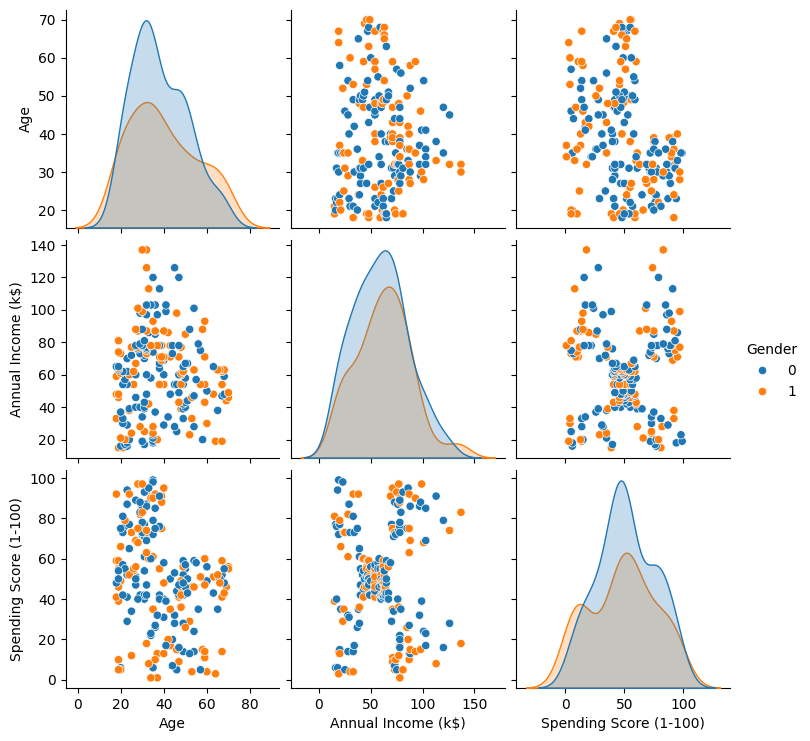

In [3]:

data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Visualizar o scatterplot
sns.pairplot(data, hue='Gender', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()


In [4]:
df = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
kmeans = KMeans()
kmeans.fit(df)


KMeans()

## **GRÁFICO DE COTOVELO**

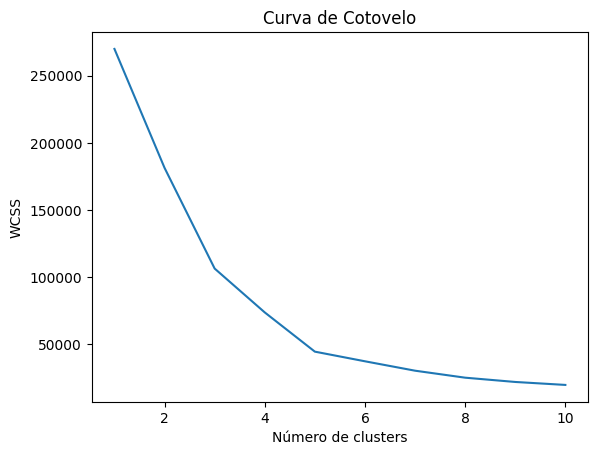

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)


In [10]:
centroids = kmeans.cluster_centers_
centroids


array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

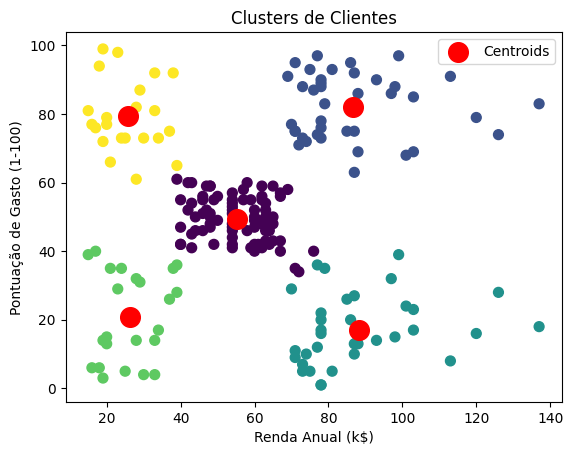

In [9]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de Gasto (1-100)')
plt.legend()
plt.show()
